## Задача 1

<Figure size 432x288 with 0 Axes>

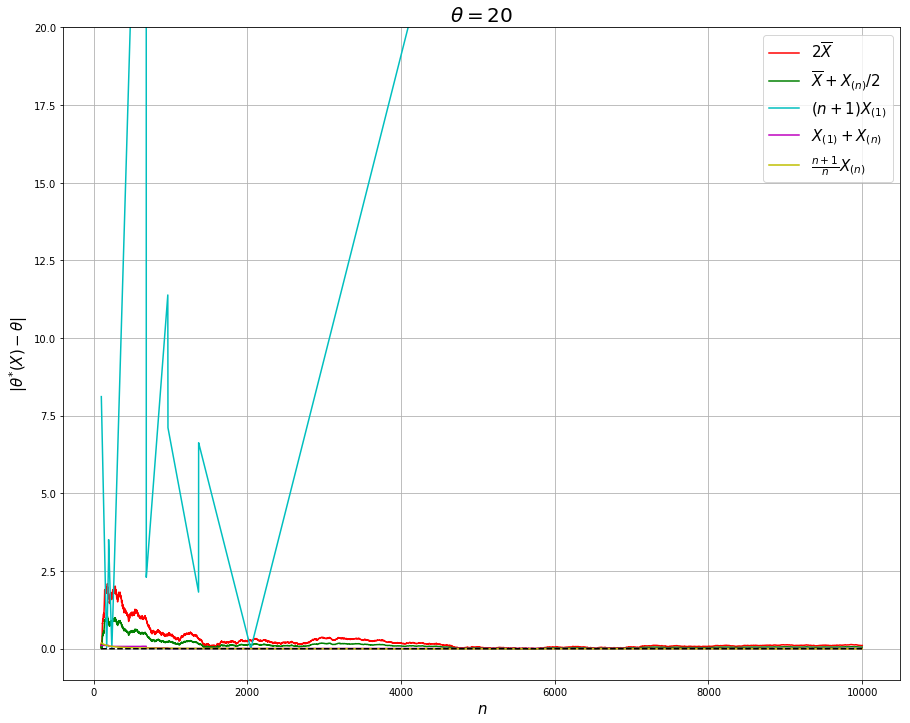

<Figure size 432x288 with 0 Axes>

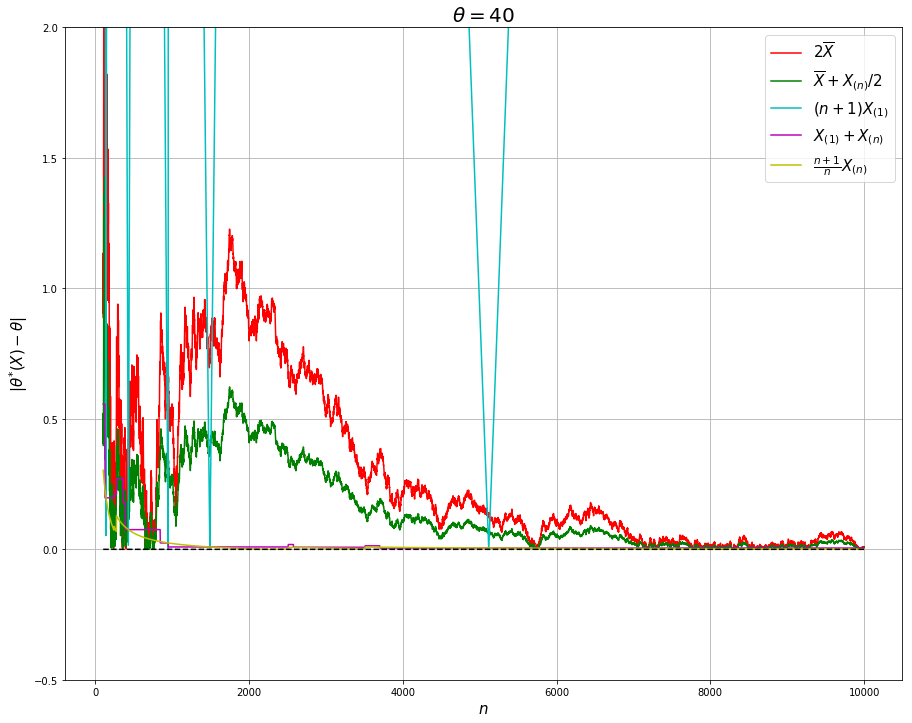

<Figure size 432x288 with 0 Axes>

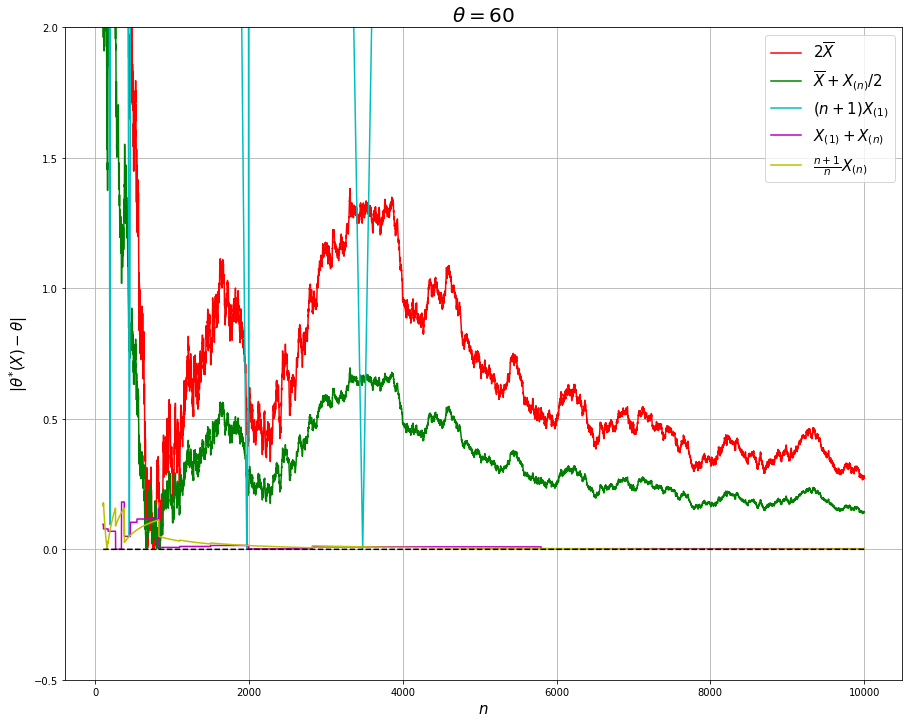

<Figure size 432x288 with 0 Axes>

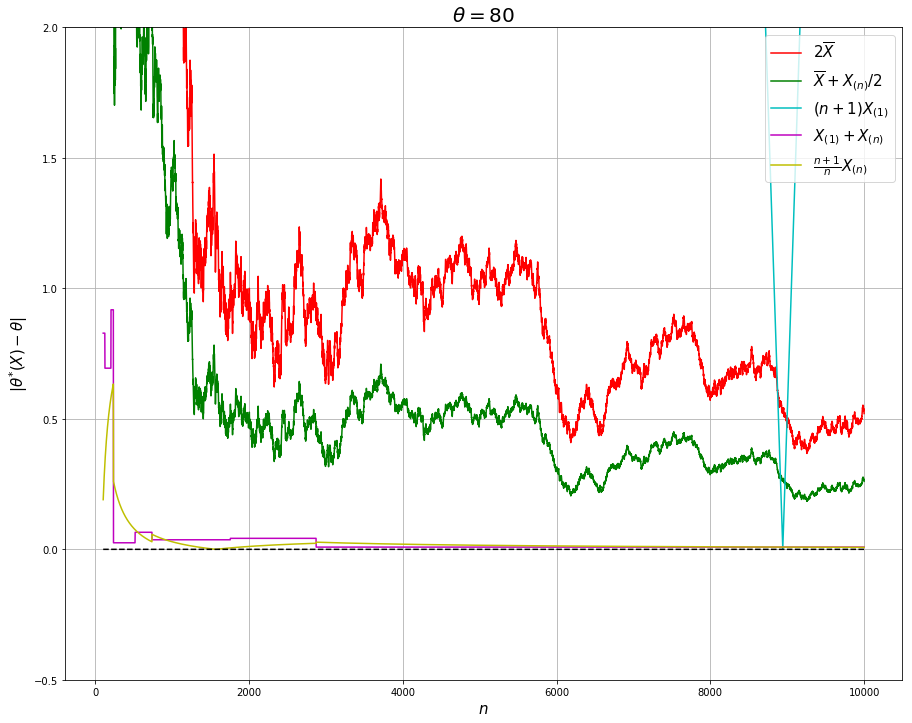

<Figure size 432x288 with 0 Axes>

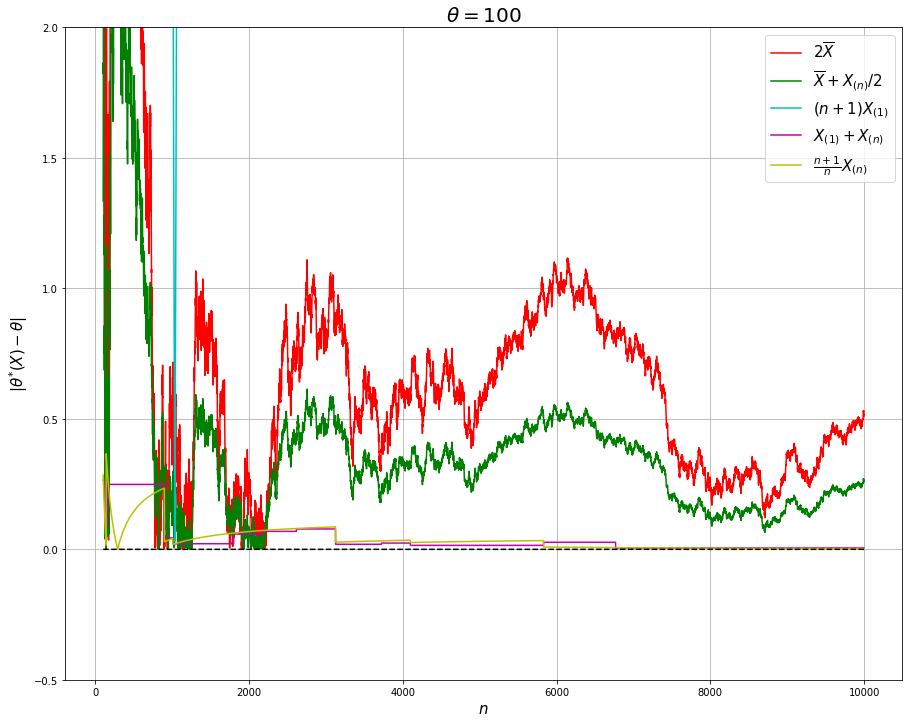

In [28]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

N = 10**4  #общее кол-во элементов выборки
n = 100  #начиная с этого номера будем отображать точки на графике, чтобы исключить "выбросы"

for i in range(1, 6):
    tetta = 20 * i #параметр, который собираемся оценивать, будем стартовать с 20 и дойдем до 100
    arr_tetta = np.ones(N) * tetta    #массив из tetta 
    time = np.arange(1, N + 1, 1)      #массив n
    X = sps.uniform.rvs(size=N, loc=0, scale=tetta)  #так получаем выборку из uniform distribution
    sample_mean = X.cumsum() / time   #выборочное среднее
    max_statics = np.maximum.accumulate(X)   #последний член вариацинного ряда
    min_statics = np.minimum.accumulate(X)   #первый член вариационного ряда
    plt.figure(i)
    plt.figure(figsize=(15, 12))
    plt.title(r'$\theta=$' + str(tetta), fontsize=20)
    if(i == 1):      #для i = 1, покажем в большем масштабе график, чтобы там была хорошо показана несостоятельность оценки (n+1)X_(1)
        plt.ylim(-1, 20)
    else:
        plt.ylim(-0.5, 2)
    plt.ylabel(r'$\vert \theta^{*}(X) - \theta \vert$', fontsize=15)
    plt.xlabel(r'$n$', fontsize=15)
    plt.plot(time[n:], np.abs(sample_mean * 2 - arr_tetta)[n:], 'r', label=r'$2 \overline{X}$')
    plt.plot(time[n:], np.abs(max_statics / 2 + sample_mean - arr_tetta)[n:], 'g', label=r'$\overline{X} + X_{(n)}/2$')
    plt.plot(time[n:], np.abs(min_statics * (time + 1) - arr_tetta)[n:], 'c', label=r'$(n + 1)X_{(1)}$')
    plt.plot(time[n:], np.abs(min_statics + max_statics - arr_tetta)[n:], 'm', label=r'$X_{(1)} + X_{(n)}$')
    plt.plot(time[n:], np.abs(((time + 1) / time) * max_statics - arr_tetta)[n:], 'y', label=r'$\frac{n+1}{n}X_{(n)}$')
    plt.plot(time[n:], np.zeros(N)[n:], 'k--')   #черная пунктирная линия показана для нагляности, к чему должен стремится модуль разности
    plt.legend(fontsize=15, loc=1)
    plt.grid()
    plt.show()

#### Пояснения к задаче 1
По УЗБЧ имеем, $\overline{X} \xrightarrow[n \rightarrow \infty]{P_\theta - п. н.} \cfrac{\theta}{2}$. Также понятно (например из Т Александрова + опр сходимости по распределению), что $X_{(1)} \xrightarrow{d_{\theta}} 0$, $X_{(n)} \xrightarrow{d_{\theta}} \theta$. Так как они сходятся к констатнте => есть сходимость по вероятности. Более того (на семинаре было уже показано) верна сходимость п. н. Из этого и следуют результаты графика. Заметим, что $F_{(n+1)X_{(1)}} \xrightarrow[n \rightarrow \infty]{} 1 - e^{-\frac{x}{\theta}}\not= I\{x \geqslant \theta\}$, что мы и наблюдаем на графике. Кстати, следует заметить, что $\frac{n+1}{n}X_{(n)}$ - лучше других приведенных оценок в среднеквадратичном подходе. 

---
### Задача 2 


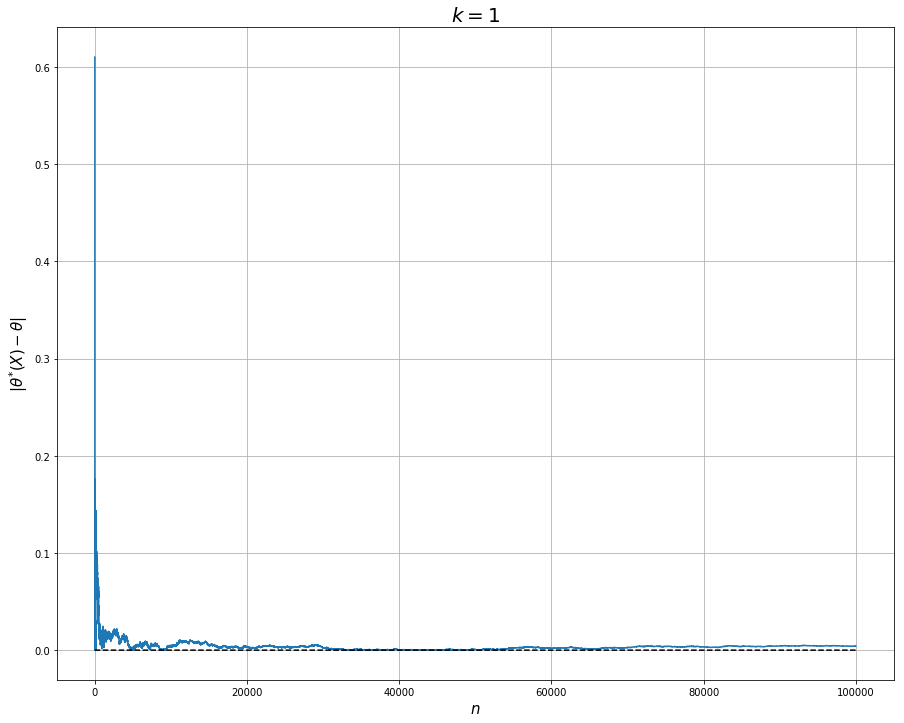

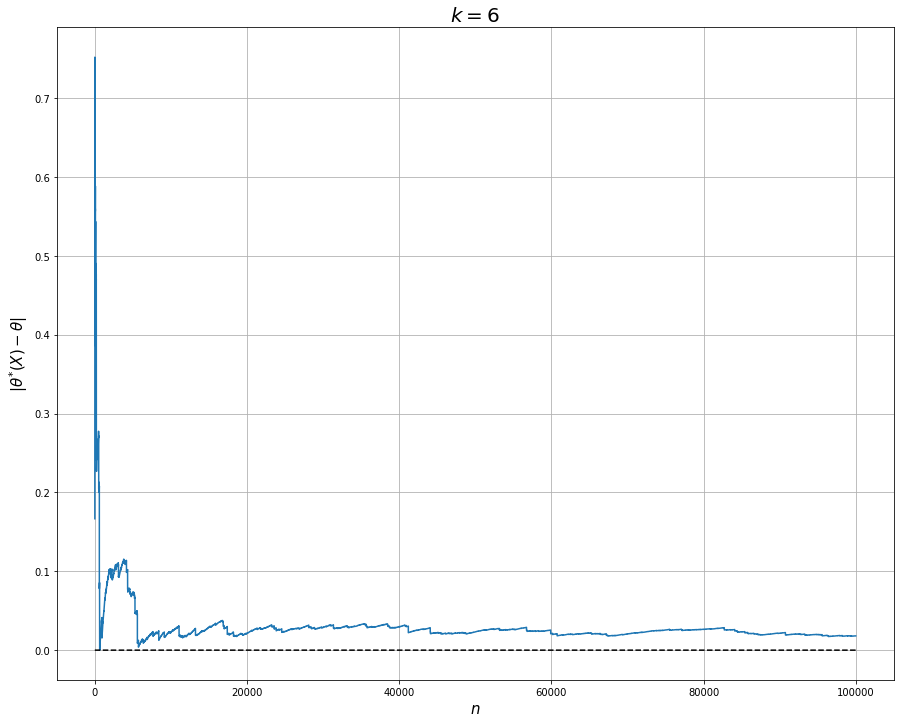

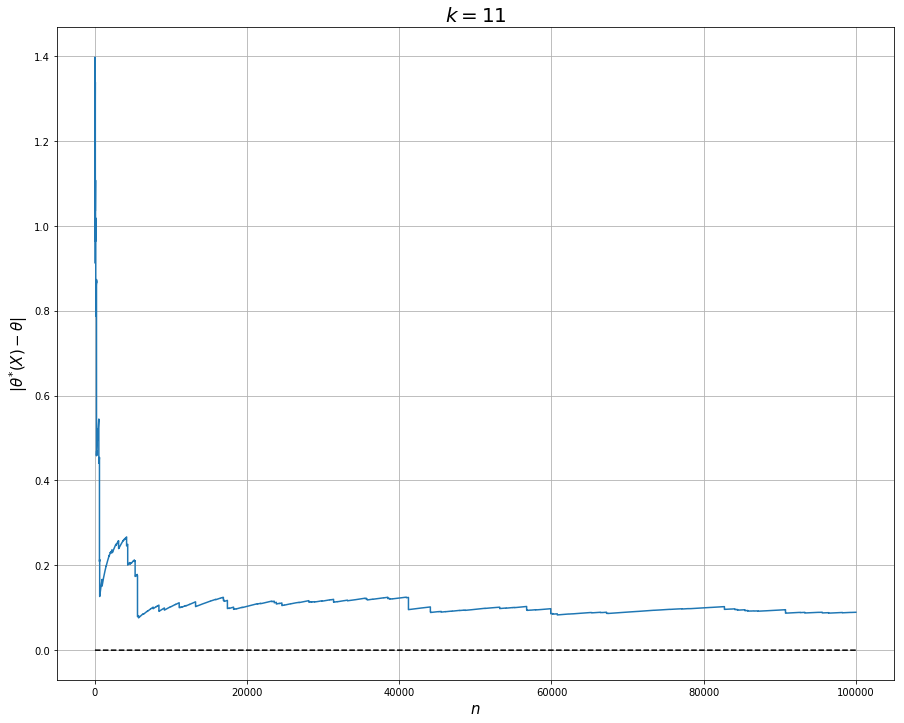

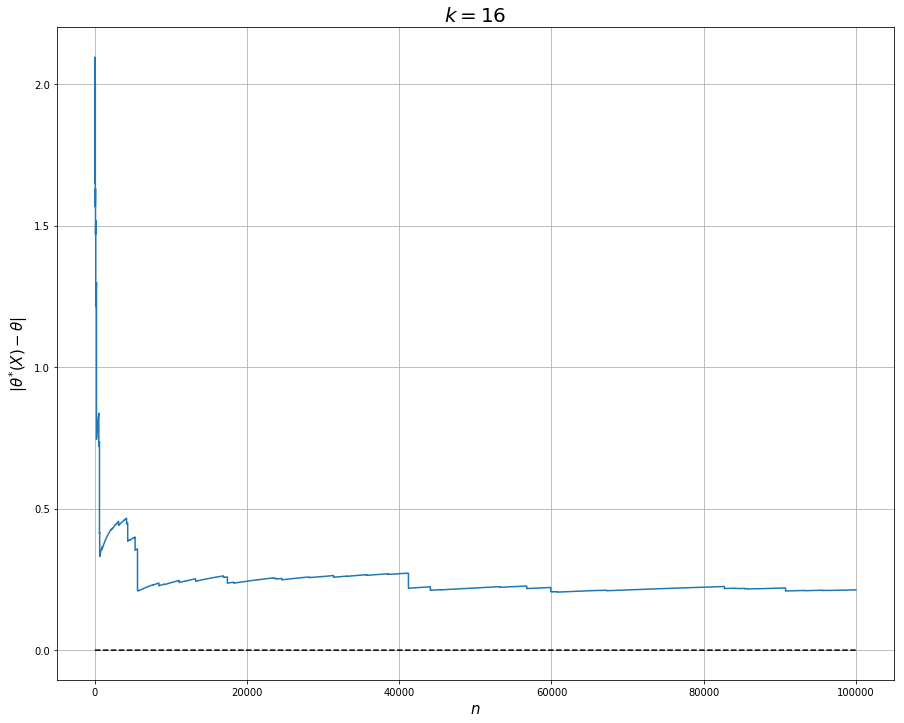

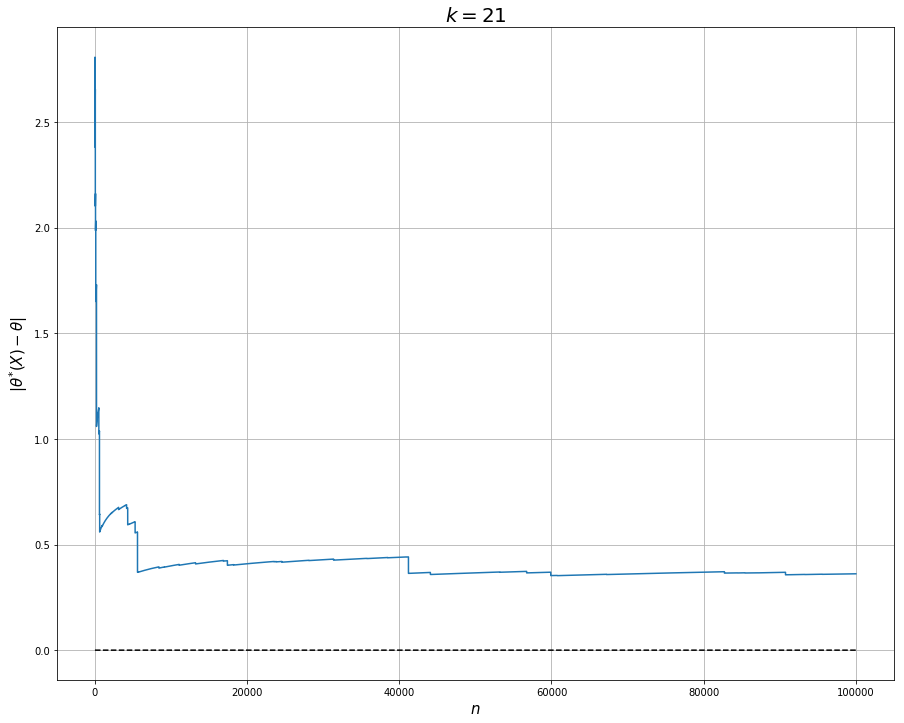

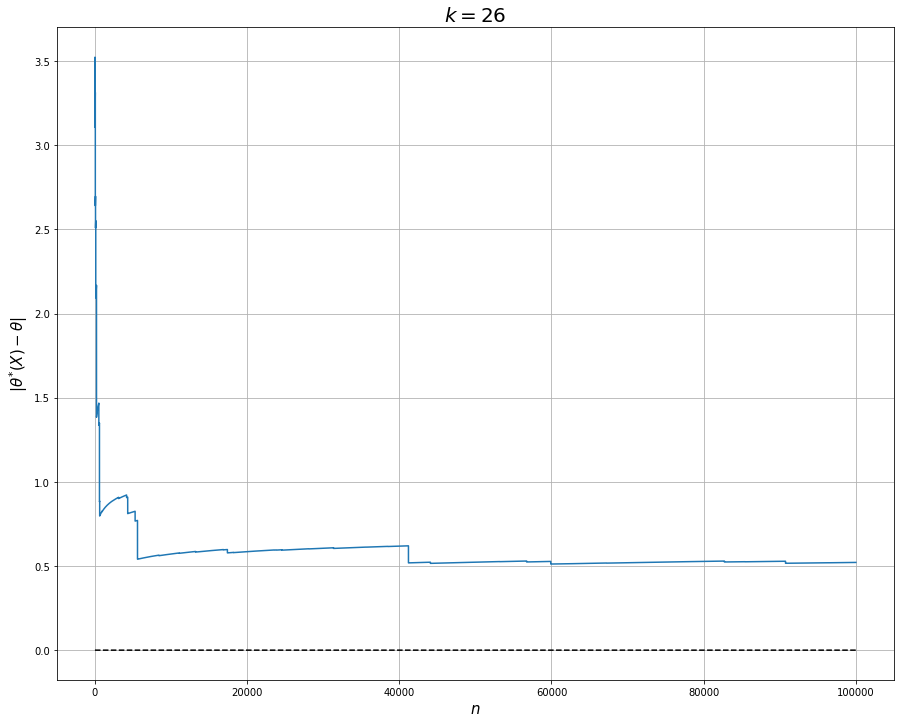

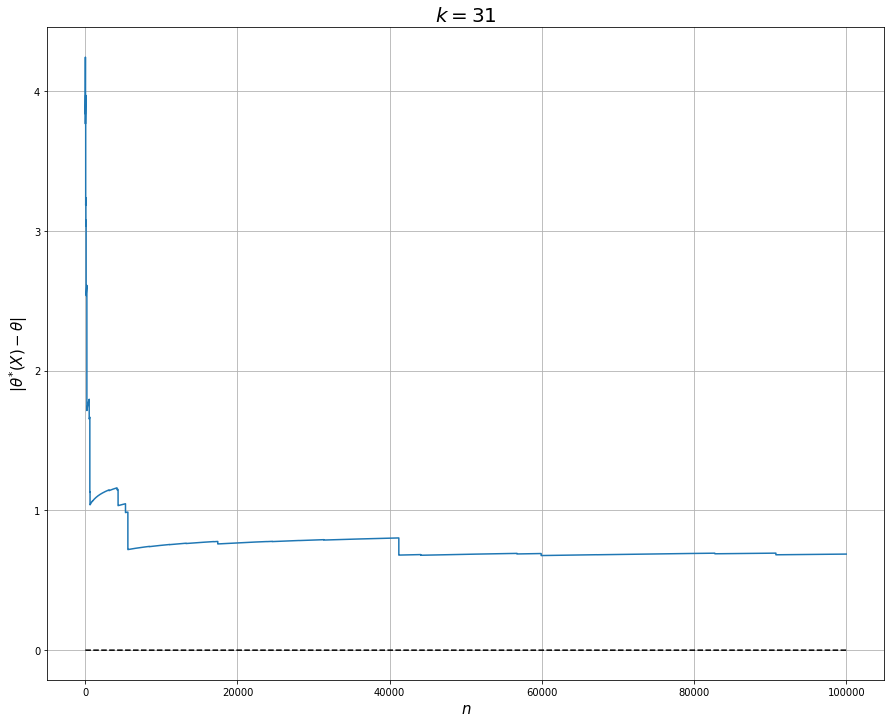

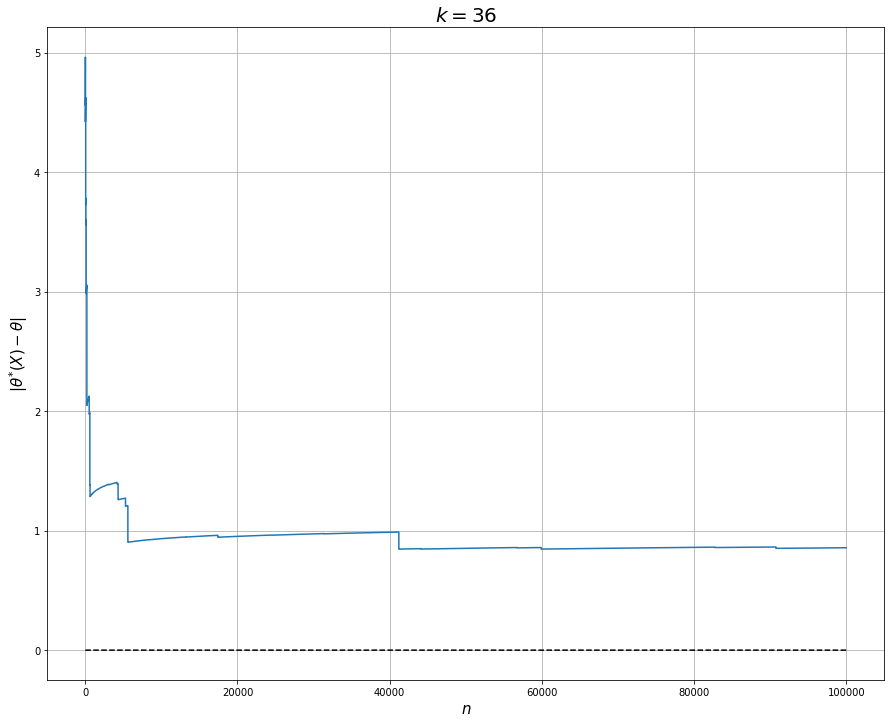

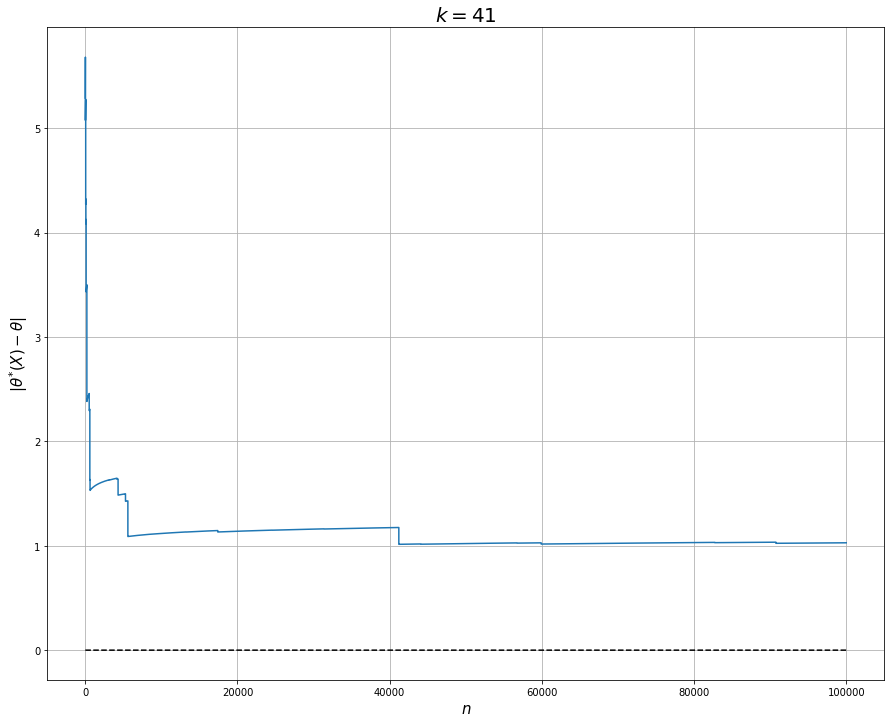

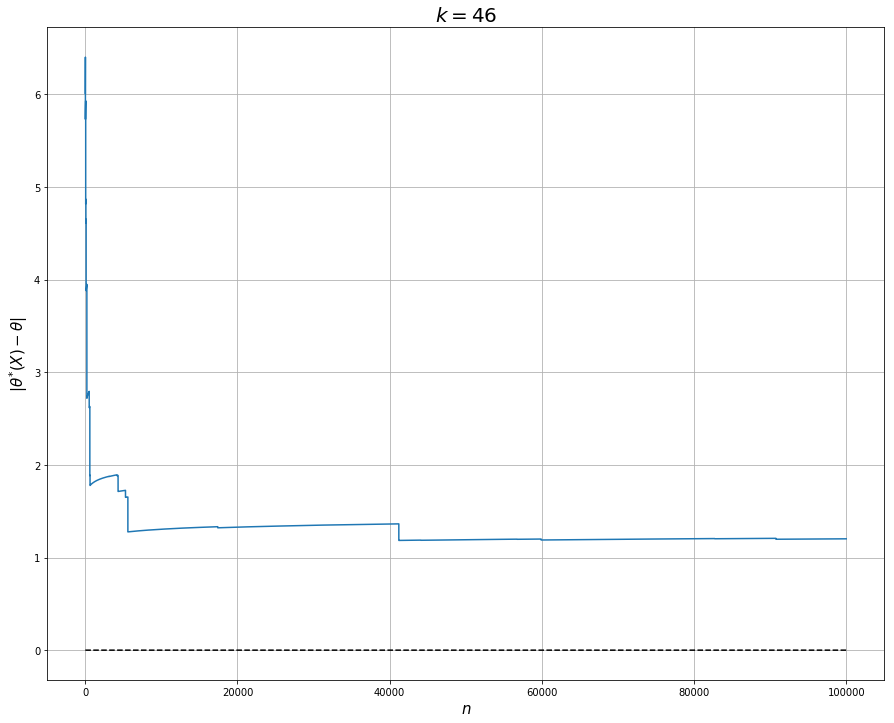

In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math

def estimate(X, k):
    time = np.arange(1, N + 1, 1)
    Y = (X**k).cumsum() / time  #посчитали выборочный k-ый момент
    Y = (math.factorial(k) / Y)**(1/k)  #получаем нашу оценку
    return Y, time

theta = 1  #задаем параметр
N = 10**5  #размер выборки
X = sps.expon.rvs(size=N, loc=0, scale=theta)
for k in range(1, 51, 5):
    Y, time = estimate(X, k)
    plt.figure(k, figsize=(15, 12))
    plt.title(r'$k = $' + str(k), fontsize=20)
    plt.ylabel(r'$\vert \theta^{*}(X) - \theta \vert$', fontsize=15)
    plt.xlabel(r'$n$', fontsize=15)
    plt.plot(time, np.abs(Y - np.ones(N) * theta))
    plt.plot(time, np.zeros(N), 'k--')
    plt.grid()

На семинаре уже было показано, что оценка $$\sqrt[\displaystyle k]{\cfrac{k!}{\overline{X^k}}}$$ параметра $\theta$ является асимптотически нормальной. Далее по л Слуцкого показывается, что оценка является состоятельной. На графиках хорошо видно, что чем меньше $k$, тем "раньше" проявляется свойство состоятельности оценки. 

---
### Задача 3


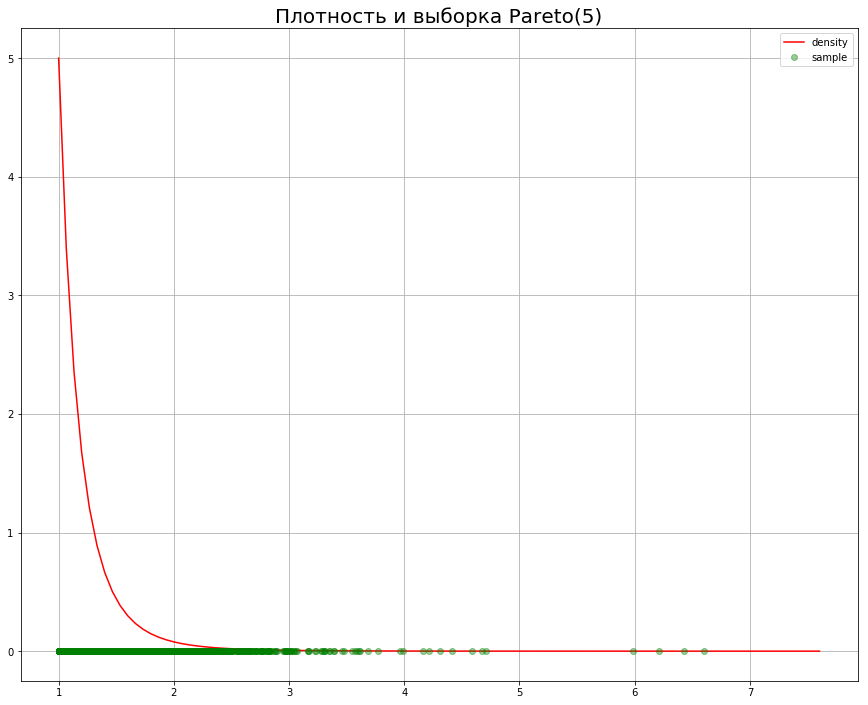

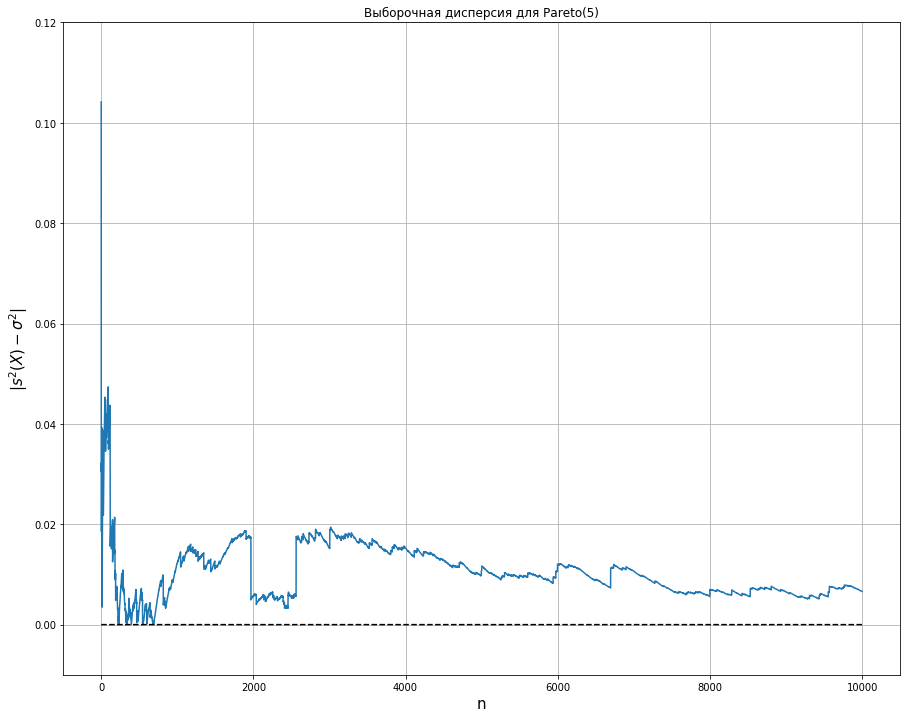

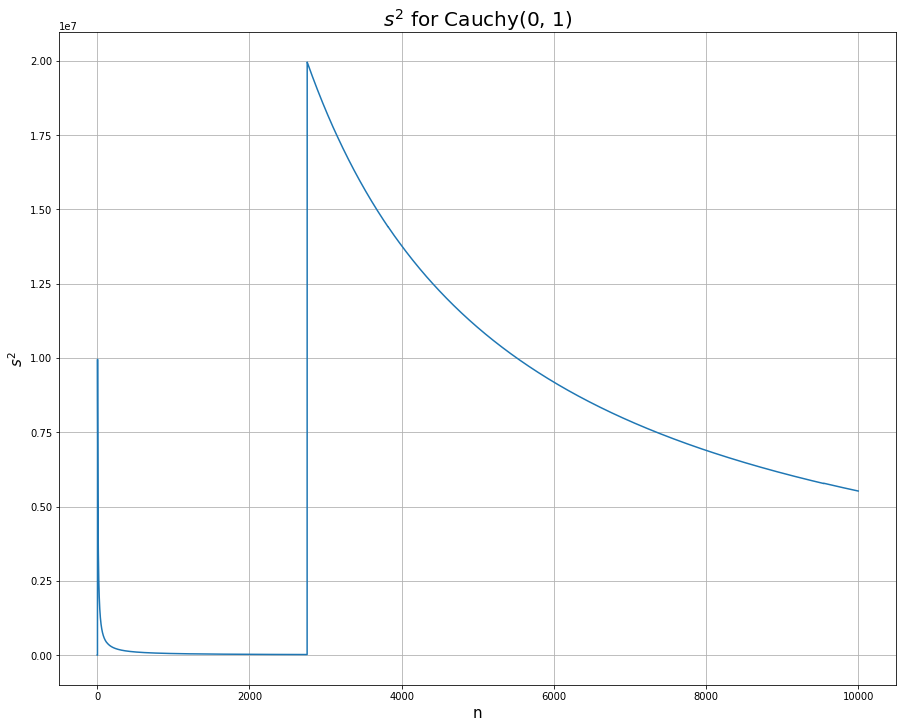

In [4]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

N = 10**4
gama = 5  #параметр распределения Парето, при котором первые 4 момента конечны, а 5-ый - нет
n = np.arange(1, N + 1, 1)
X = sps.pareto.rvs(size=N, b=gama)  #распределение Парето
Var = sps.pareto.var(gama)
left = 1 
right = np.max(X) + 1
grid = np.linspace(left, right, 100)  #сетка для построения плотности
S = (X**2).cumsum() / n - (X.cumsum() / n)**2  #выборочная дисперсия 
#------------------------------  Строим график плотности и выборку
plt.figure(1, figsize=(15,12))
plt.title(r'Плотность и выборка Pareto(5)', fontsize=20)
plt.plot(grid, sps.pareto.pdf(grid, b=gama), 'r', label='density')
plt.plot(X, np.zeros(N), 'og', alpha=0.4, label='sample')
plt.legend()
plt.grid()
#-----------------------------  Строим график модуля разности выборочной дисперсии и дисперсии
plt.figure(2, figsize=(15, 12))
plt.title(r'Выборочная дисперсия для Pareto(5)')
plt.plot(n, np.abs(S - Var))
plt.plot(n, np.zeros(N), 'k--')
plt.ylabel(r'$\vert s^2(X) - \sigma^2 \vert$', fontsize=15)
plt.xlabel(r'n', fontsize=15)
plt.ylim(-0.01, 0.12)
plt.grid()
#---------------------------- то же самое для распределения Коши
X = sps.cauchy.rvs(size=N)
S = (X**2).cumsum() / n - (X.cumsum() / n)**2  #выборочная дисперсия 
plt.figure(3, figsize=(15, 12))
plt.title(r'$s^2$ for Cauchy(0, 1)', fontsize=20)
plt.ylabel(r'$s^2$', fontsize=15)
plt.xlabel(r'n', fontsize=15)
plt.plot(n, np.abs(S))
plt.grid()

Здесь нужно только пояснить, почему выбрано распределение Парето с параметром $\gamma = 5$, у которого плотность распределения $$p_{\xi}(x) = \gamma x^{-\gamma - 1}.$$ Действительно, очевидно что здесь будут конечны только первые 4 момента. Также на семинаре показывалось уже $s^2$-выборочная дисперсия является состоятельной оценкой дисперсии $\sigma^2$, что мы и наблюдаем на графике. 

---
### Задача 4

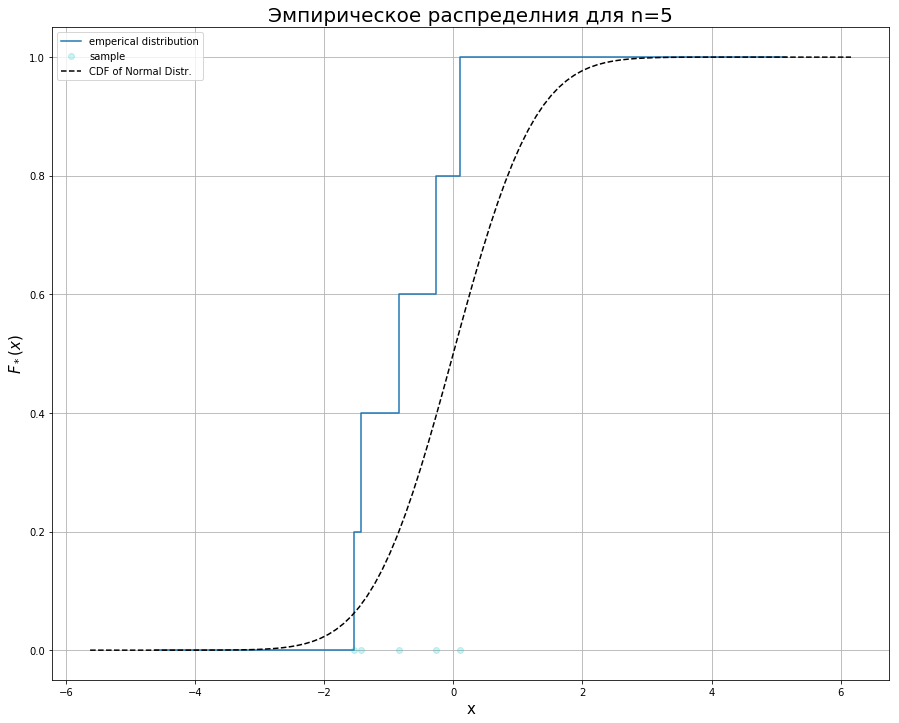

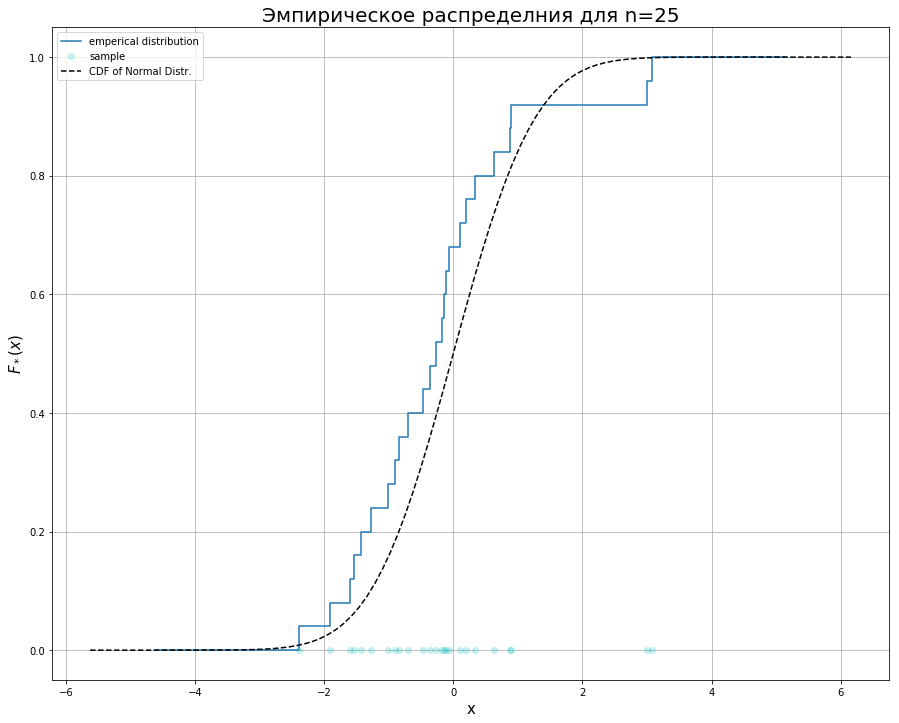

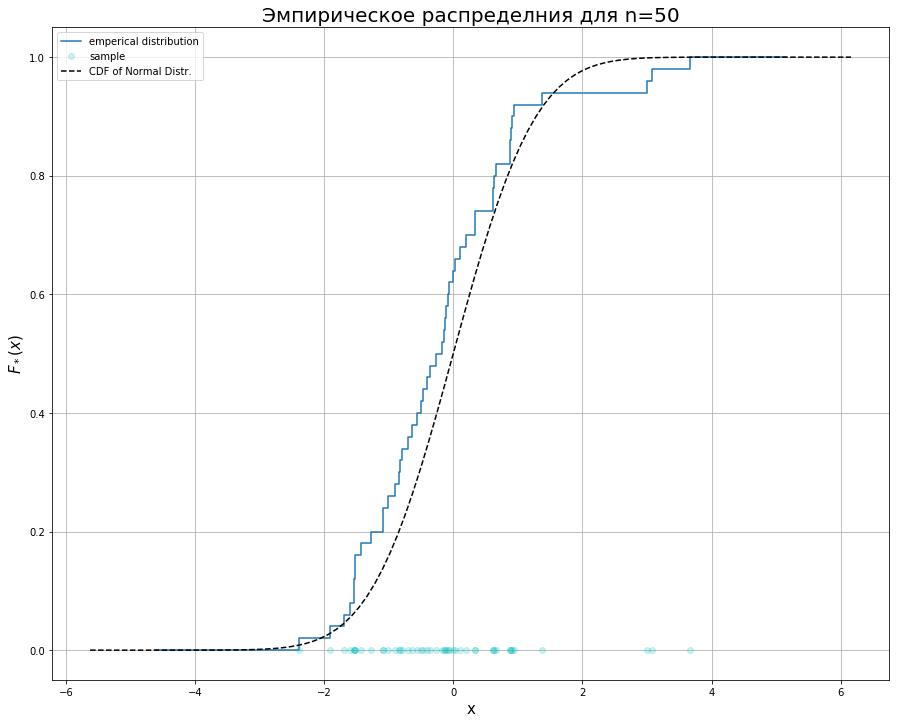

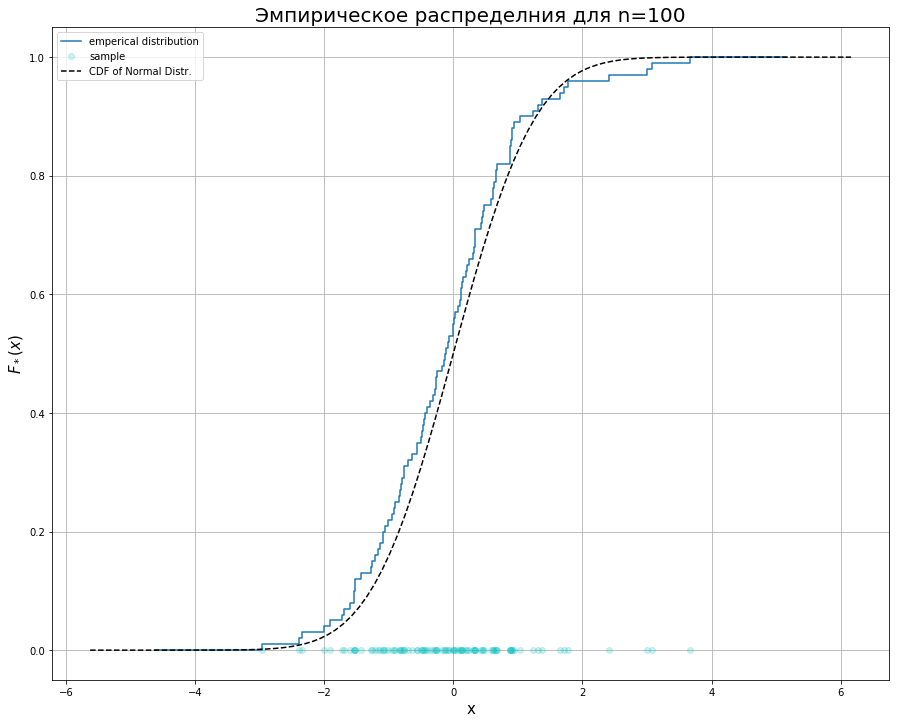

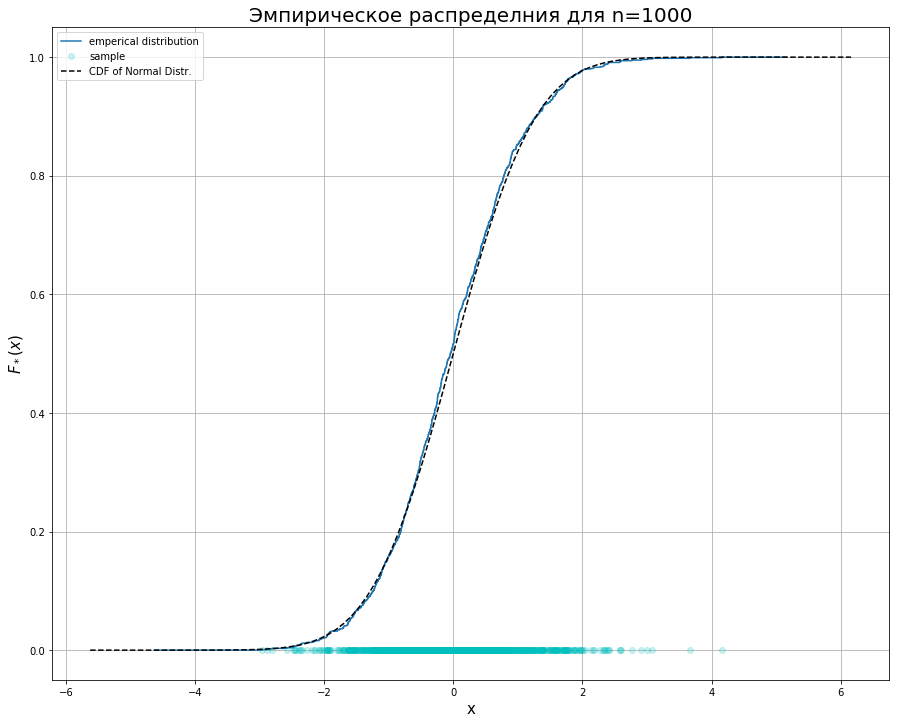

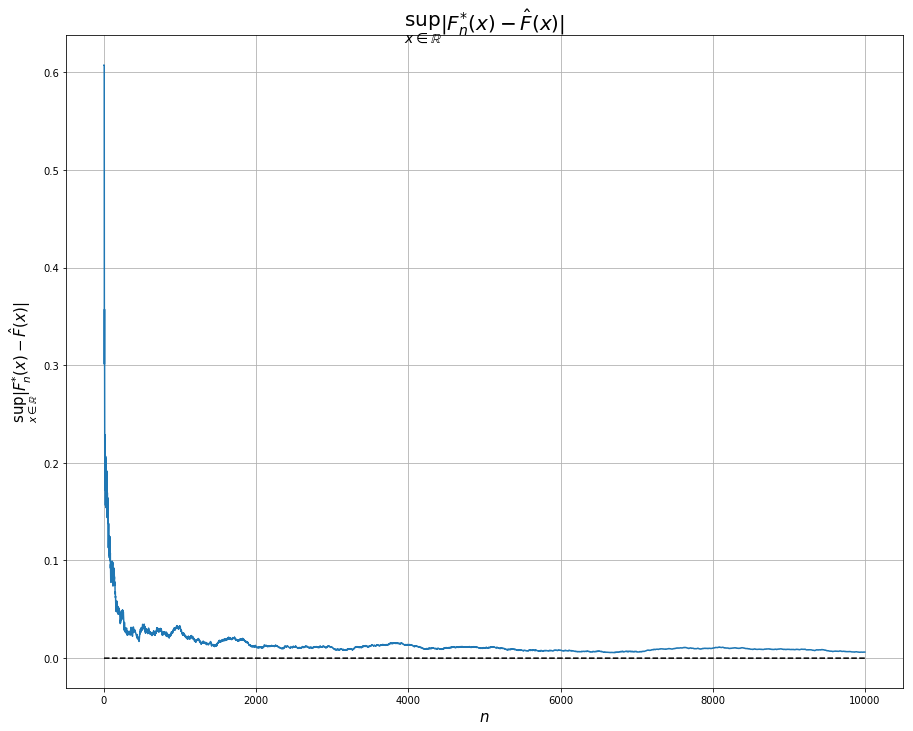

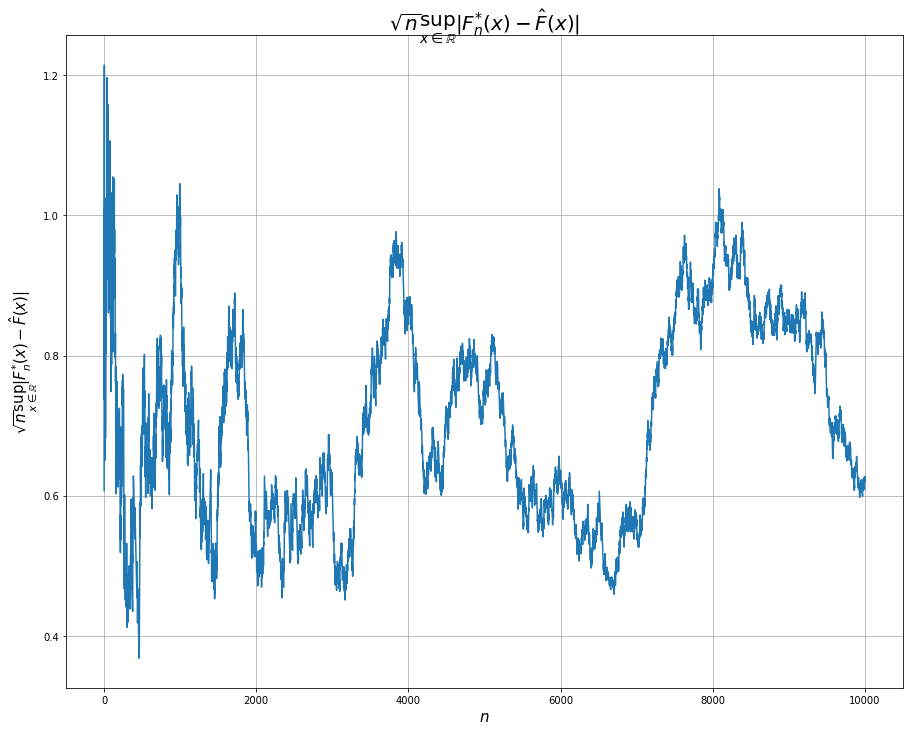

In [14]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

def EmpericalFunction(X, n):  #расчет эмперических функций расперделений 
    grid = X[:n]   #в качетсве сетки используем сами значения выборки, так как именно в них эмпирическая функция будет меняться
    grid = np.sort(grid)  #просортируем сетку, чтобы удобно было потом построить занчения эмпирической функции
    grid = np.insert(grid, 0, np.min(X) - 1) #эти вставки сделаны для наглядности на графике, чтобы видно было 0 и 1 эмпирической функции
    grid = np.append(grid, np.max(X) + 1)
    values = [(i + 1) / n for i in range(0, n)]  #значения эмпирической функции 
    values = np.insert(values, 0, 0)
    values = np.append(values, 1)
    return grid, values

N = 10**4
a = 0  #матожидание нормального распределения
var = 1  #дисперсия нормального распределения
X = sps.norm.rvs(size=N, loc=a, scale=var)  #выборка из нормального распределения
emp_fun = []
for n in range(1, N + 1):
    grid, values = EmpericalFunction(X, n)  #для каждого n получаем эмперическую функцию распределения
    emp_fun.append([grid, values])  #добавляем в массив эмпирических распределений сетку и значения функции на ней
number_of_figure = 1
#расчитываем sup разности функций (заметим, что здесь супермум будет достигаться в одной из точек выборки, так как
#эмпирическая ф. р. ступенчатая со скачками в точках выборки, а функция распределения нормального распределения - непрерывна)
Dif = [np.max(np.abs(sps.norm.cdf(grid) - values)) for grid, values in emp_fun]  
Dif_n = [np.sqrt(n + 1) * Dif[n] for n in range(0, N)] #получаем (n^1/2)D
for n in [5, 25, 50, 100, 1000]:
    grid, values = emp_fun[n - 1]
    plt.figure(number_of_figure, figsize=(15, 12))
    plt.title(r'Эмпирическое распределния для n=' + str(n), fontsize=20)
    plt.step(grid, values, where='post', label='emperical distribution')
    plt.plot(X[:n], np.zeros(n), 'co', alpha=0.2, label='sample')
    grid = np.linspace(np.min(grid) - 1, np.max(grid) + 1, 100)
    plt.plot(grid, sps.norm.cdf(grid, loc=a, scale=var), 'k--', label="CDF of Normal Distr.")
    plt.ylabel(r'$F_*(x)$', fontsize=15)
    plt.xlabel('x', fontsize=15)
    plt.grid()
    plt.legend()
    number_of_figure += 1
#Строим график для супремума модуля разнности эмпирической и истинной ф. р.  
plt.figure(number_of_figure, figsize=(15, 12))
plt.title(r'$\sup_{x \in \mathbb{R}} \vert F^{*}_n(x) - \hat{F}(x)\vert$', fontsize=20)
plt.xlabel(r'$n$', fontsize=15)
plt.ylabel(r'$\sup_{x \in \mathbb{R}} \vert F^{*}_n(x) - \hat{F}(x) \vert$', fontsize=15)
plt.plot(np.arange(1, N + 1), Dif)
plt.plot(np.arange(1, N + 1), np.zeros(N), 'k--')
plt.grid()
#Второй график
plt.figure(number_of_figure + 1, figsize=(15, 12))
plt.title(r'$\sqrt{n} \sup_{x \in \mathbb{R}} \vert F^{*}_n(x) - \hat{F}(x) \vert$', fontsize=20)
plt.xlabel(r'$n$', fontsize=15)
plt.ylabel(r'$\sqrt{n} \sup_{x \in \mathbb{R}} \vert F^{*}_n(x) - \hat{F}(x) \vert$', fontsize=15)
plt.plot(np.arange(1, N + 1), Dif_n)
plt.grid()

Итак, в этой задаче мы наглядно убедились в справедливости теоремы Гливенко-Кантелли, которая говорит нам, о том что: $$\sup_{x \in \mathbb{R}} \vert F^*_n(x) - \hat{F}(x) \vert \xrightarrow[n \rightarrow \infty]{п.н.} 0,$$ где $F^*_n(x)$-эмпирическая функция распределения, а $\hat{F}(x)$-истинная функция распределения. 